In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text)
from sklearn.metrics import (accuracy_score, log_loss, mean_squared_error)
from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)
from ISLP.bart import BART

### Problem 7:

(a) Split to train and test set, then give test error of a Random Forest model

(b) Plot the MSE difference when the values of n_estimator and max_features vary

In [3]:
Boston = load_data('Boston')
X = Boston.drop(columns='medv')
y = Boston['medv']
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, random_state=42)

rf = RF(n_estimators=100, max_features=6).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(((y_pred - y_test)**2).mean())

8.086883970588236


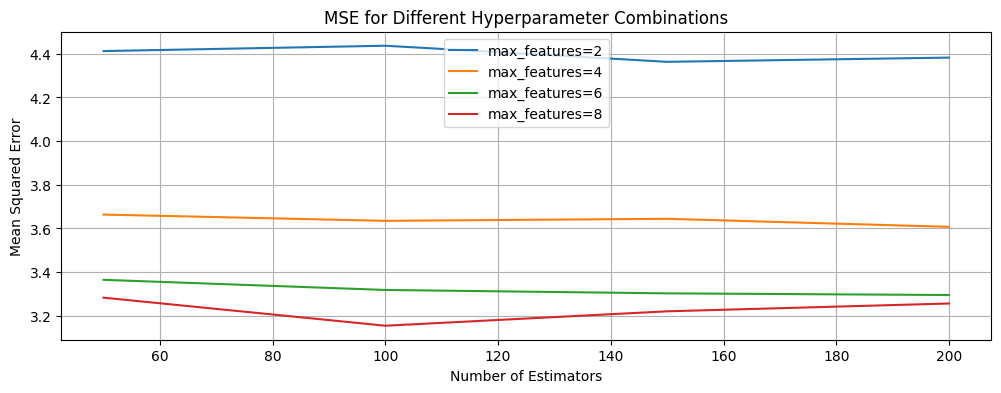

In [47]:
n_estimators_list = [50, 100, 150, 200]
max_features_list = [2, 4, 6, 8]

results = []

for n_estimators in n_estimators_list:
    for max_features in max_features_list:
        rf = RF(n_estimators=n_estimators, max_features=max_features, random_state=0)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results.append((n_estimators, max_features, mse))

n_estimators_vals = [r[0] for r in results]
max_features_vals = [r[1] for r in results]
mse_vals = [r[2] for r in results]

plt.figure(figsize=(12, 4))
for max_features in max_features_list:
    mse_for_max_features = [mse for n_estimators, max_f, mse in results if max_f == max_features]
    plt.plot(n_estimators_list, mse_for_max_features, label=f'max_features={max_features}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.show()

### Problem 8:

(a) Split to train and test set, then obtain decision tree test error at depth 3

(b) Use cross-validation, the best depth is 6 and give a much better test MSE

In [48]:
Carseats = load_data('Carseats')
X = Carseats.drop(columns='Sales')
y = Carseats['Sales']

X = pd.get_dummies(X, columns=['ShelveLoc', 'Urban', 'US'])

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, random_state=42)
dtr = DTR(max_depth = 3, random_state=0).fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(f'MSE of decision tree with depth=3: {mean_squared_error(y_pred, y_test)}')

MSE of decision tree with depth=3: 6.684051881402442


[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\nsquared_error = 7.412\nsamples = 320\nvalue = 7.388'),
 Text(0.25, 0.625, 'Price <= 125.5\nsquared_error = 5.956\nsamples = 256\nvalue = 6.776'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 49.5\nsquared_error = 5.0\nsamples = 173\nvalue = 7.473'),
 Text(0.0625, 0.125, 'squared_error = 3.798\nsamples = 68\nvalue = 8.691'),
 Text(0.1875, 0.125, 'squared_error = 4.195\nsamples = 105\nvalue = 6.684'),
 Text(0.375, 0.375, 'Age <= 65.0\nsquared_error = 4.828\nsamples = 83\nvalue = 5.324'),
 Text(0.3125, 0.125, 'squared_error = 4.02\nsamples = 66\nvalue = 5.84'),
 Text(0.4375, 0.125, 'squared_error = 2.934\nsamples = 17\nvalue = 3.324'),
 Text(0.75, 0.625, 'Price <= 135.0\nsquared_error = 5.753\nsamples = 64\nvalue = 9.835'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Price <= 73.0\nsquared_error = 3.976\nsamples = 50\nvalue = 10.581'),
 Text(0.5625, 0.125, 'squared_error = 0.911\nsamples = 4\nvalue = 14.222'),
 Text(0.6875, 0.

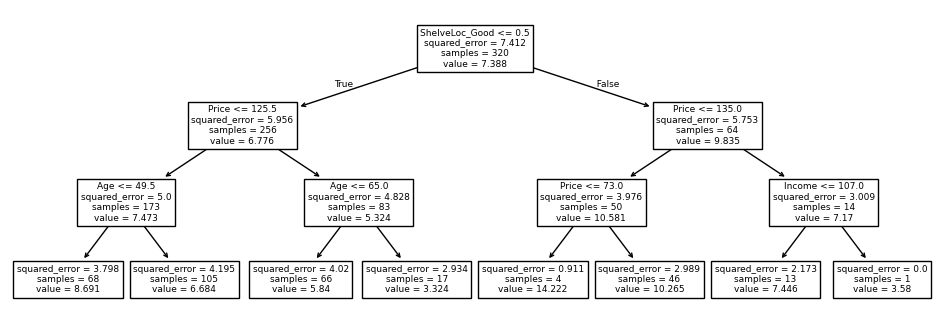

In [21]:
ax = subplots(figsize=(12, 4))[1]
feature_names = X_train.columns
plot_tree(dtr, feature_names=feature_names, ax=ax)

Text(0, 0.5, 'Cross-validation error')

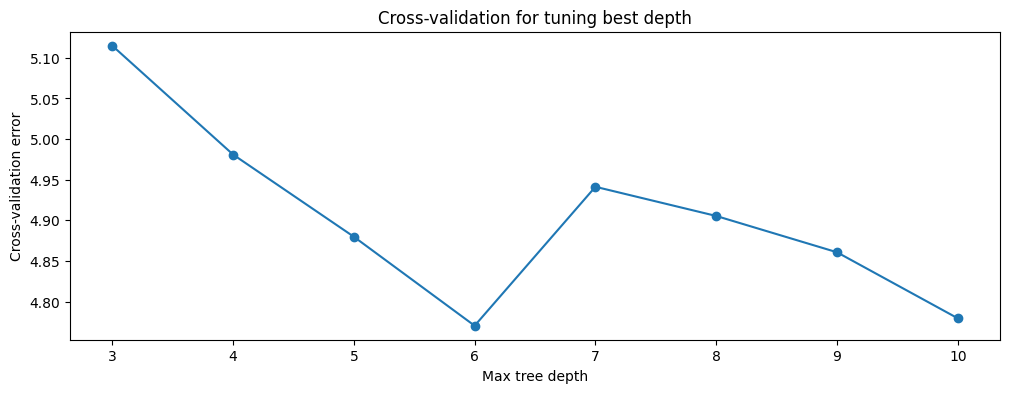

In [45]:
max_depth_list = range(3, 11)
mean_score = []

for max_depth in max_depth_list:
    dtr = DTR(max_depth=max_depth, random_state=0)
    cv_scores = skm.cross_val_score(dtr, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_score.append(-cv_scores.mean())

plt.figure(figsize=(12, 4))
plt.plot(max_depth_list, mean_score, marker='o')
plt.title('Cross-validation for tuning best depth')
plt.xlabel('Max tree depth')
plt.ylabel('Cross-validation error')


In [50]:
dtr = DTR(max_depth = 6, random_state=0).fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(f'MSE of decision tree with depth=6: {mean_squared_error(y_pred, y_test)}')

MSE of decision tree with depth=6: 4.930793151203329


In [51]:
max_features = X.shape[1]
tree_count = 100

rf = RF(max_features=max_features, n_estimators=tree_count, random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'MSE of bagging (random forest with all features): {mean_squared_error(y_pred, y_test)}')

MSE of bagging (random forest with all features): 3.1007010496249987


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35')])

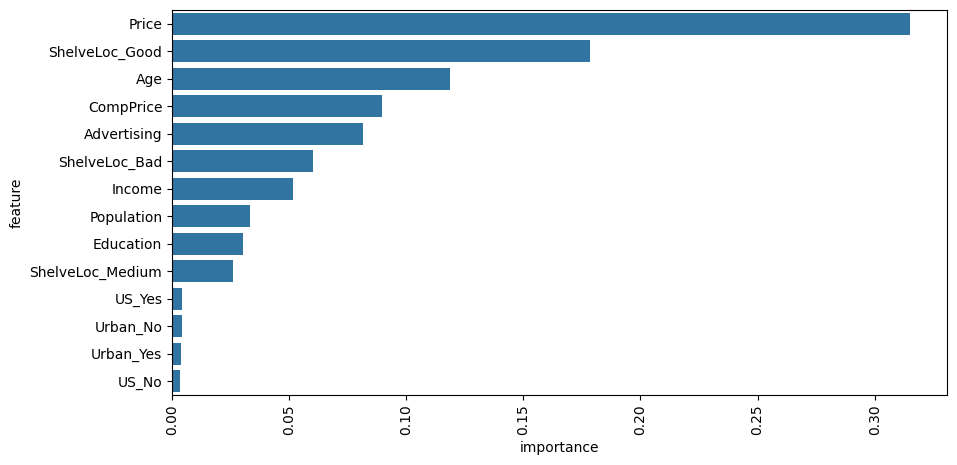

In [56]:
plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})

plt.figure(figsize=(10,5))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False))
plt.xticks(rotation=90)

In [64]:
max_features = 9
tree_count = 100

rf = RF(max_features=max_features, n_estimators=tree_count, random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'MSE of bagging (random forest with all features): {mean_squared_error(y_pred, y_test)}')

MSE of bagging (random forest with all features): 3.070885755499999


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35')])

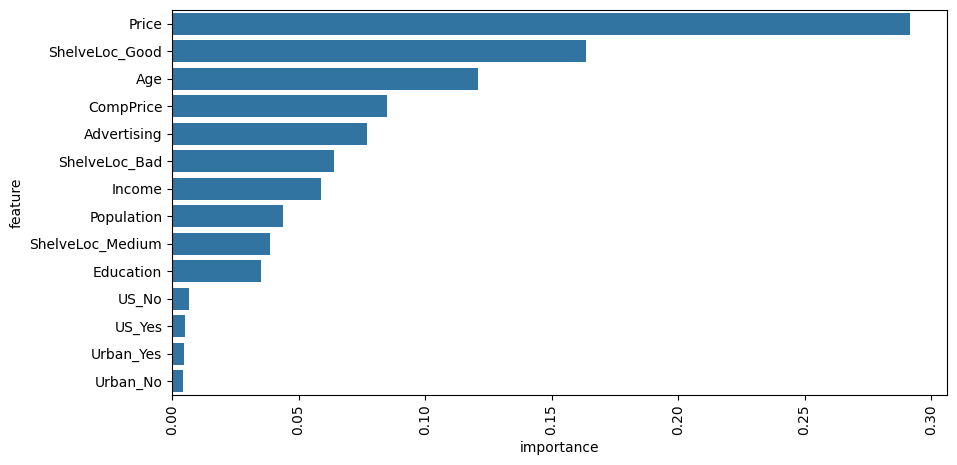

In [65]:
plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})

plt.figure(figsize=(10,5))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False))
plt.xticks(rotation=90)

### Problem 10:

(a) Split to train and test set with fixed test size

(b) Tune the learning curve parameter and feature importance

In [83]:
Hitters = load_data('Hitters').dropna()
Hitters['Salary'] = np.log(Hitters['Salary'])

X = Hitters.drop(columns='Salary')
X = pd.get_dummies(X, columns=['League', 'Division', 'NewLeague'])

y = Hitters['Salary']

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=63, random_state=0)

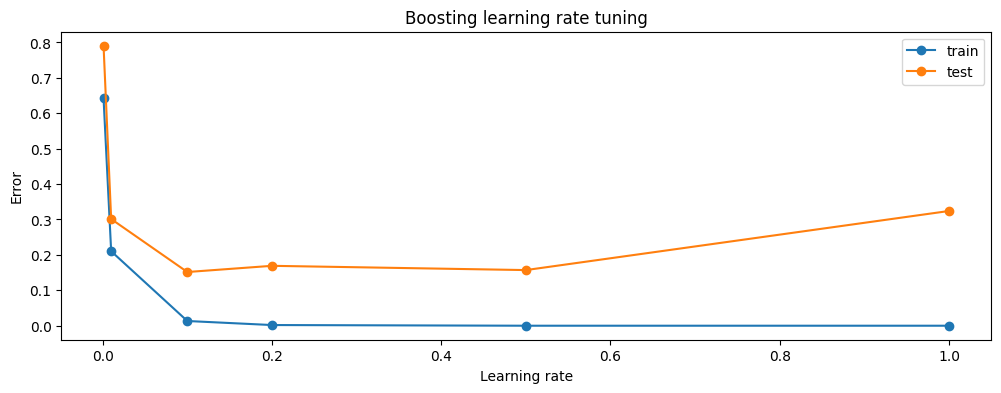

In [126]:
rates = [0.001, 0.01, 0.1, 0.2, 0.5, 1]
train_result, test_result = [], []
for rate in rates:
    X_new, y_new = X_train.copy(), y_train.copy()
    gbr = GBR(n_estimators=100, learning_rate=rate, random_state=0).fit(X_train, y_train)
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)
    train_result.append(mean_squared_error(y_train_pred, y_train))
    test_result.append(mean_squared_error(y_test_pred, y_test))

plt.figure(figsize=(12, 4))
plt.plot(rates, train_result, label='train', marker='o')
plt.plot(rates, test_result, label='test', marker='o')
plt.title('Boosting learning rate tuning')
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.legend()


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6')])

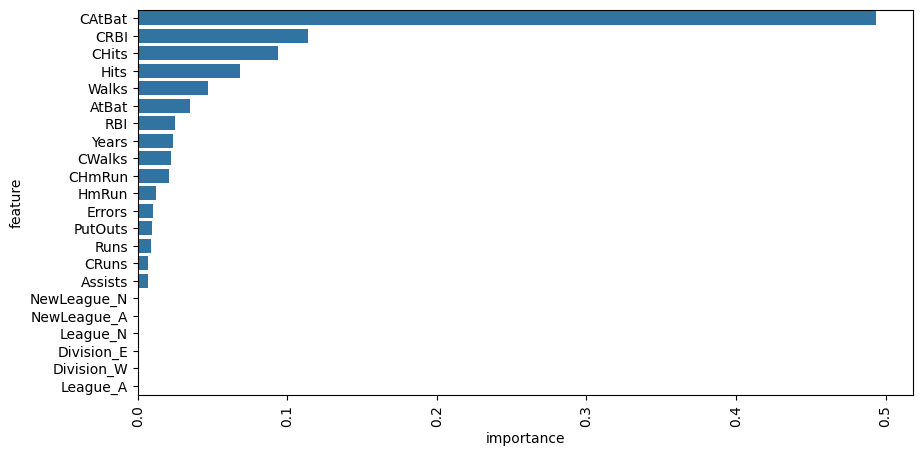

In [128]:
X_new, y_new = X_train.copy(), y_train.copy()
gbr = GBR(n_estimators=100, learning_rate=0.1, random_state=0).fit(X_train, y_train)
plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': gbr.feature_importances_})

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False))
plt.xticks(rotation=90)